In [2]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import math

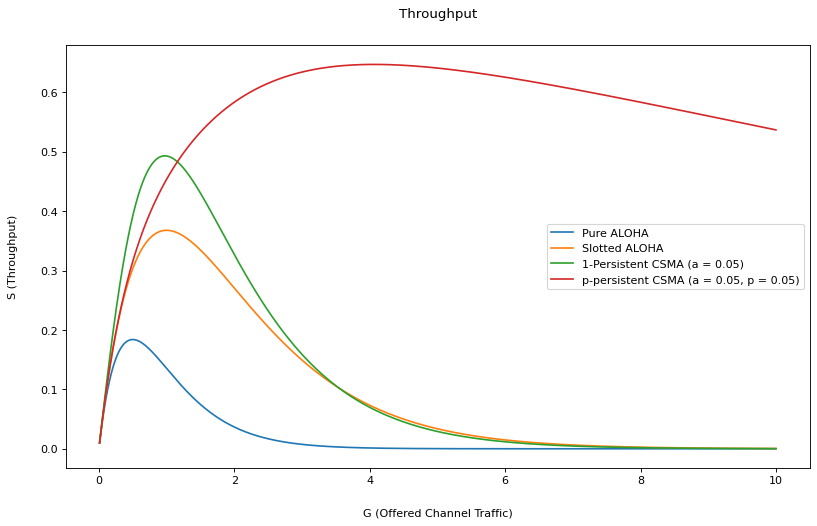

In [42]:
# Pure ALOHA: S = Ge^-2G
pureALOHA = lambda G: G * math.exp(-2*G)

# Slotted ALOHA: S = Ge^-G
slottedALOHA = lambda G: G * math.exp(-G)

# 1-Persistent CSMA
onePersistentCSMA = lambda G, a: (
    (G * (1 + G + (a*G * (1 + G + a*G/2))) * math.exp(-G * (1 + 2*a))) /
    ((G * (1 + 2*a)) - (1 - math.exp(-a*G)) + ((1 + a*G) * math.exp(-G * (1 + a))))
)

# p-persistent CSMA
class pPersistentCSMA:
    def __init__(self, G, p, a):
        self.G = G
        self.p = p
        self.a = a
        
        self.g = a * G
        self.q = 1 - p
        
        self.pi_0 = math.exp(-self.G * (1 + self.a))
        self.pi_0_bar = math.exp(-self.g)
        
        self.t = self.compute_t()
        self.t_bar = self.compute_t(bar=True)
        
        self.ps = self.compute_ps()
        self.ps_bar = self.compute_ps(bar=True)
    
    def compute_t(self, bar=False):
        if bar:
            pi_0 = self.pi_0_bar
        else:
            pi_0 = self.pi_0
        
        return (math.pow(pi_0, self.p) - pi_0) / (1 - pi_0 - (math.pow(pi_0, self.p) - pi_0) * (math.exp(-self.p * self.g)))
    
    def compute_ps(self, bar=False):
        if bar:
            pi_0 = self.pi_0_bar
        else:
            pi_0 = self.pi_0
        
        return ((math.pow(pi_0, self.p) - pi_0) / (self.q * (1 - pi_0))) - (((1 - math.exp(-self.g * self.p)) * (math.pow(pi_0, (1 - math.pow(self.q, 2))) - pi_0)) / ((self.q * (1 - pi_0)) - (self.q * math.exp(-2 * self.g * self.p) * (math.pow(pi_0, self.p) - pi_0))))
    
    def compute(self):
        numerator = ((1 - math.exp(-self.a * self.G)) * ((self.ps_bar * self.pi_0) + (self.ps * (1 - self.pi_0))))
        denominator = ((1 - math.exp(-self.a * self.G)) * ((self.a * self.t_bar * self.pi_0) + (self.a * self.t * (1 - self.pi_0)) + 1 + self.a) + (self.a * self.pi_0))
        return (numerator / denominator)
    
    
a = 0.05
p = 0.05

G = [i * 0.01 for i in range(1, 1001)]
S1 = [pureALOHA(g) for g in G]
S2 = [slottedALOHA(g) for g in G]
S3 = [onePersistentCSMA(g, a) for g in G]
S4 = [pPersistentCSMA(g, p, a).compute() for g in G]

figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(G, S1, label="Pure ALOHA")
plt.plot(G, S2, label="Slotted ALOHA")
plt.plot(G, S3, label="1-Persistent CSMA (a = 0.05)")
plt.plot(G, S4, label="p-persistent CSMA (a = 0.05, p = 0.05)")

plt.xlabel("G (Offered Channel Traffic)",  labelpad=20)
plt.ylabel("S (Throughput)",  labelpad=20)
plt.title("Throughput", y=1.05)

# To show max utilization of pure ALOHA
# plt.axvline(0.5, 0, 1, linestyle='dashed', linewidth=0.8, alpha=0.8, color='blue')
# To show max utilization of slotted ALOHA
# plt.axvline(1.0, 0, 1, linestyle='dashed', linewidth=0.8, alpha=0.8, color='orange')

plt.legend()
plt.show()